<h1>Practical work 1: introduction and image enhancement</h1>


<h2>Short introduction to image processing with Python</h2>

Help: use the function help() to get information on a Python objet.

Images are stored as arrays that is the default type of the numpy module. Defaut type of array elements is float64 according to the IEEE754 norm. Special float values are defined: infinity (inf) and undefined (nan, not a number), and some numerical constants, such as 
π
.

In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)

inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


<h2>Creating an array: several ways.</h2>

1. From a list of values (formally any Python iterable object). Elements of an array have the same type, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as empty(), zeros(), ones()... Shape should be given (see below). Important: empty() does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer arange() from numpy to range() from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


<h2>Shape of an array</h2>

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example:

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is reshape() to change the shape of an array. Typical usage of reshape() is to transform a vector into a matrix or reciprocally.

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


<h2>Elements of an array</h2>

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator : allows to extract subarray. General syntaxe is start:end:step and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])

extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


<h2>Array arithmetic</h2>

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, np.matmul() is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator T.

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


<h2>Images</h2>

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
# Image.fromarray(myimage).save('img/moon.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

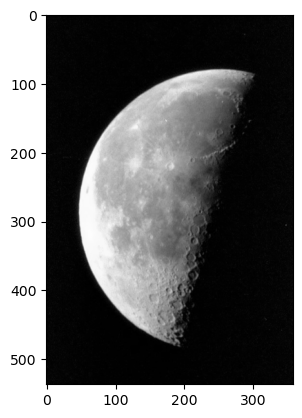

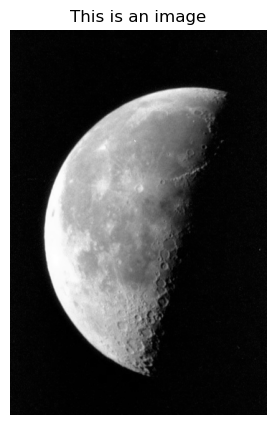

In [13]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage, vmin = 0, vmax = 255)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()

<h2> Exercise 1 </h2>

In this exercice, we work with image img/moon.png. If possible give two solutions : one with loops (for, while, ...) and one without loops.

1. Write and test a function openImage() getting an image filename as argument and returning the array of pixel values.


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def openImage(image):
    """ str -> Array 
    """
    #plt.imshow(moon, cmap='gray', vmin=0, vmax=255)
    #plt.show()

    return np.array(Image.open(image)) 

print('Opened Image:')
print(openImage('img/moon.png'))

Opened Image:
[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function countPixels() getting an array and an integer k as arguments and returning the number of pixels having the value k.

In [15]:
moon = openImage('img/moon.png') 


def countPixels(I,k):
    """ Array*int -> int"""
    return (I==k).sum()
print('Amount of pixels:')
print(countPixels(moon,3))

Amount of pixels:
25408


3. Write and test a function replacePixels() getting an array and two intergers and replacing pixels having k1value to k2 value and returning the new array. Be aware to not modify I.

In [16]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    a = np.array(I)
    return np.where(a==k1, k2, a)

print('Replaced pixels:')
print(replacePixels(moon, 1, 7))
b = np.array(moon)
print(np.shape(b))

Replaced pixels:
[[ 7  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
(537, 358)


4. Write and test a function normalizeImage() getting an array and two integers k1 and k2 and returning an array with elements normalized to the interval 
[
k
1
,
k
2
]
.

In [17]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    a = np.array(I)
    d = k2-k1
    d_arr = np.max(a)-np.min(a)
    return (((a-np.min(a))*d)/d_arr)+k1

print('Normalize image:')
print(normalizeImage(moon, 0, 1))

Normalize image:
[[0.00395257 0.01185771 0.02766798 ... 0.03162055 0.06324111 0.03162055]
 [0.01185771 0.02766798 0.01185771 ... 0.01581028 0.04347826 0.04743083]
 [0.02371542 0.01581028 0.02371542 ... 0.02766798 0.00790514 0.01185771]
 ...
 [0.01581028 0.03162055 0.03162055 ... 0.02371542 0.01581028 0.03162055]
 [0.01581028 0.03162055 0.03162055 ... 0.01581028 0.02371542 0.02371542]
 [0.00790514 0.01185771 0.01185771 ... 0.02371542 0.03557312 0.03557312]]


5. Write and test a function inverteImage() getting an array and returning and arry having inverted pixel values (i.e. the transform 
k
↦
255
−
k

In [18]:
def inverteImage(I):
    """ Array -> Array """
    a = np.array(I)
    return np.max(a)-a

print('Inverted image:')
print(inverteImage(moon))

Inverted image:
[[252 250 246 ... 245 237 245]
 [250 246 250 ... 249 242 241]
 [247 249 247 ... 246 251 250]
 ...
 [249 245 245 ... 247 249 245]
 [249 245 245 ... 249 247 247]
 [251 250 250 ... 247 244 244]]


6. Write and test a function computeHistogram() getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels?

In [19]:
def computeHistogram(I): 
    """ Array -> list[int] """
    a = np.array(I)
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T
    # return dict(zip(unique, counts))

print('Histogram:')   
print(computeHistogram(moon))

#It is possible to compute a histogram without explicitely visiting array using dictionary. 
# return dict(zip(unique, counts)) instead of return np.asarray

Histogram:
[[    0  1459]
 [    1 20126]
 [    2 30924]
 [    3 25408]
 [    4 17167]
 [    5 11368]
 [    6  7369]
 [    7  4767]
 [    8  3213]
 [    9  2178]
 [   10  1486]
 [   11   993]
 [   12   632]
 [   13   488]
 [   14   371]
 [   15   301]
 [   16   255]
 [   17   217]
 [   18   201]
 [   19   202]
 [   20   190]
 [   21   165]
 [   22   168]
 [   23   140]
 [   24   160]
 [   25   157]
 [   26   129]
 [   27   136]
 [   28   140]
 [   29   135]
 [   30   137]
 [   31   121]
 [   32   137]
 [   33   114]
 [   34   127]
 [   35   129]
 [   36   115]
 [   37   132]
 [   38   123]
 [   39   124]
 [   40   101]
 [   41    91]
 [   42   122]
 [   43   116]
 [   44   129]
 [   45   109]
 [   46   108]
 [   47   116]
 [   48   113]
 [   49   123]
 [   50   109]
 [   51   140]
 [   52   101]
 [   53   109]
 [   54   114]
 [   55   117]
 [   56   140]
 [   57   127]
 [   58   140]
 [   59   142]
 [   60   129]
 [   61   134]
 [   62   192]
 [   63   160]
 [   64   179]
 [   65   165]

7. Write and test a function thresholdImage() getting an array I and an integer s and returning an array having elements set to 0 if corresponding element of I is lower than s or 255 otherwise.

In [20]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    a = np.array(I)
    return np.where(a<s, 0, 255)

print('Array:')
print(thresholdImage(moon, 7))

Array:
[[  0   0 255 ... 255 255 255]
 [  0 255   0 ...   0 255 255]
 [  0   0   0 ... 255   0   0]
 ...
 [  0 255 255 ...   0   0 255]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0 255 255]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use plot() or bar() from matplotlib.pyplot module), inverse the image and display it, plot its histogram.

Image


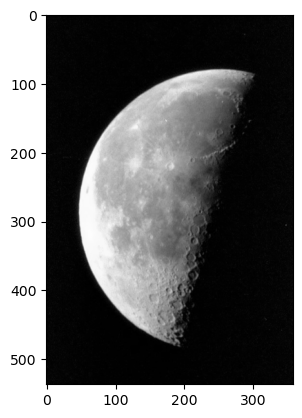

Histogram


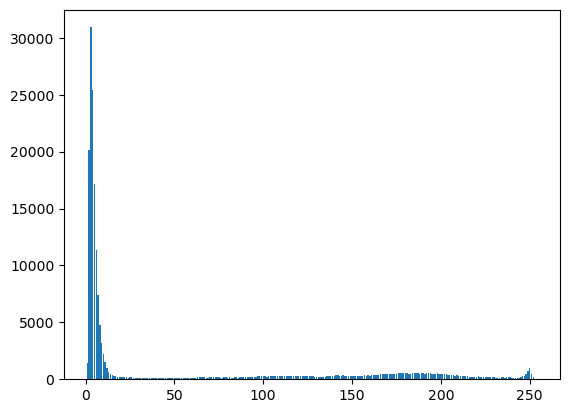

Inverted image


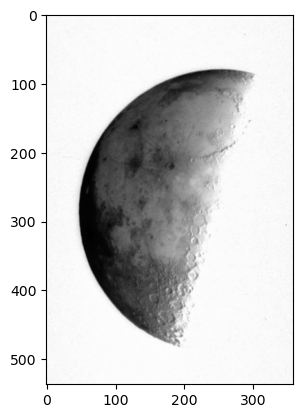

Inverted histogram


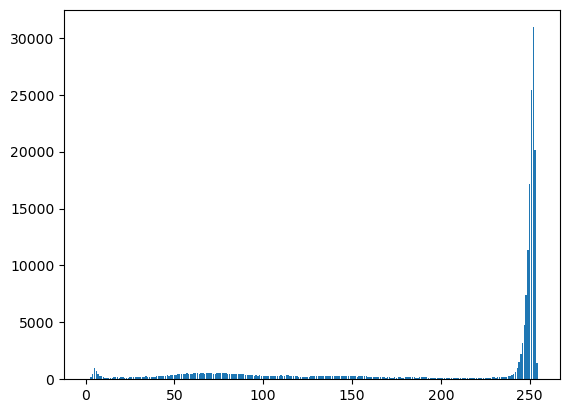

In [23]:
import matplotlib.pyplot as plt

## your code start below

import matplotlib.pyplot as plt

# Displaying the image 
moon_1 = openImage('img/moon.png')
print('Image')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
plt.show()

# Computing the histogram 
moonHist = computeHistogram(moon_1)

moonFreq = np.delete(moonHist, 0, axis=1)

x = np.arange(1,255,1)
y = moonFreq.flatten()

# Plot the histogram 
print('Histogram')
plt.bar(x, y)
plt.show()

# Displaying the inverted image
print('Inverted image')
moon_inverted = inverteImage(moon)
plt.imshow(moon_inverted, cmap = 'gray', vmin=0, vmax=255)
plt.show()

# Computing the inverted histogram
print('Inverted histogram')
moonHist_inverted = computeHistogram(moon_inverted)

moonFreq_inverted = np.delete(moonHist_inverted, 0, axis=1)

x1 = np.arange(1,255,1)
y_inverted = moonFreq_inverted.flatten()
y1 = y_inverted

# Plot the inverted histogram 
plt.bar(x1, y1)
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval 
[
10
,
50
]
, compute the new histogram, display the image and the histogram. Remark: imshow() normalizes image. To avoid this and see the effect of the normalization, use imshow() with parameters vmin=0,vmax=255. Comment the results.

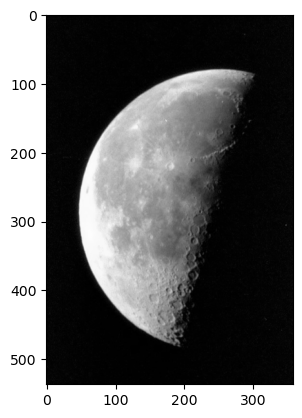

Normalized image array:
[[10.15810277 10.4743083  10.09486166 ... 10.25296443 10.50592885
  10.25296443]
 [10.4743083  10.09486166 10.4743083  ... 10.63241107 10.72727273
  10.88537549]
 [10.9486166  10.63241107 10.9486166  ... 10.09486166 10.31620553
  10.4743083 ]
 ...
 [10.63241107 10.25296443 10.25296443 ... 10.9486166  10.63241107
  10.25296443]
 [10.63241107 10.25296443 10.25296443 ... 10.63241107 10.9486166
  10.9486166 ]
 [10.31620553 10.4743083  10.4743083  ... 10.9486166  10.41106719
  10.41106719]]
Normalized image:


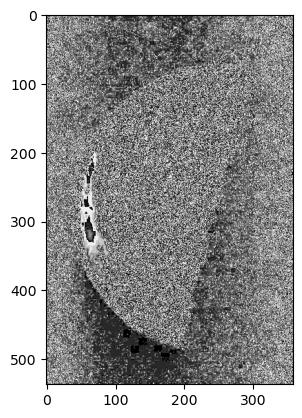

[[1.00000000e+01 3.37300000e+03]
 [1.00316206e+01 2.43100000e+03]
 [1.00632411e+01 2.31300000e+03]
 [1.00948617e+01 6.65400000e+03]
 [1.01264822e+01 2.00700000e+03]
 [1.01581028e+01 2.20050000e+04]
 [1.01897233e+01 2.28700000e+03]
 [1.02213439e+01 1.95900000e+03]
 [1.02529644e+01 5.02200000e+03]
 [1.02845850e+01 2.04100000e+03]
 [1.03162055e+01 3.28040000e+04]
 [1.03478261e+01 2.13900000e+03]
 [1.03794466e+01 1.92000000e+03]
 [1.04110672e+01 4.13100000e+03]
 [1.04426877e+01 2.09800000e+03]
 [1.04743083e+01 2.72870000e+04]
 [1.05059289e+01 2.17900000e+03]
 [1.05375494e+01 1.87000000e+03]
 [1.05691700e+01 3.37000000e+03]
 [1.06007905e+01 2.22200000e+03]
 [1.06324111e+01 1.89970000e+04]
 [1.06640316e+01 2.11500000e+03]
 [1.06956522e+01 1.90600000e+03]
 [1.07272727e+01 2.87200000e+03]
 [1.07588933e+01 2.51700000e+03]
 [1.07905138e+01 1.32650000e+04]
 [1.08221344e+01 2.00200000e+03]
 [1.08537549e+01 1.80200000e+03]
 [1.08853755e+01 2.54500000e+03]
 [1.09169960e+01 2.77800000e+03]
 [1.094861

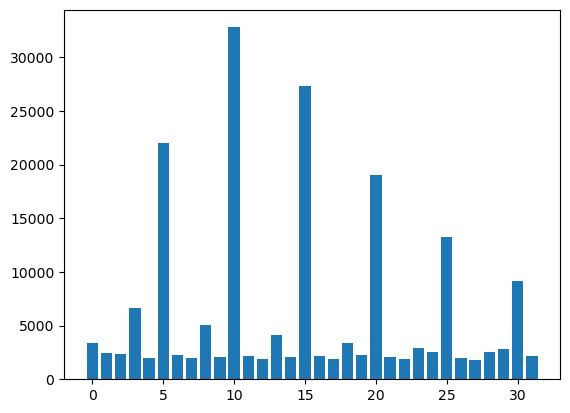

In [24]:
import matplotlib.pyplot as plt

moon_1 = openImage('img/moon.png')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
plt.show()
computeHistogram(moon_1)


normImageArray = normalizeImage(moon_1, 10, 50)
print('Normalized image array:')
print(normImageArray)
norm = plt.imshow(normImageArray , cmap = 'gray')
print('Normalized image:')
plt.show()


unique, counts = np.unique(normImageArray, return_counts=True)
b = np.asarray((unique, counts)).T
print(b)

c = np.delete(b, 0, axis=1)
x = range(0,32)
d = c.flatten()
y = d

#plotting
print('Histogram:')
plt.bar(x, y)
plt.show()

10. Same question than 9. remplacing the normalization by a thresholding with parameter s =127.

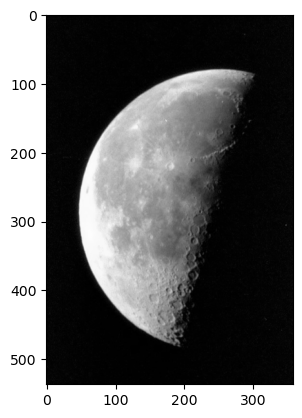

Histogram:


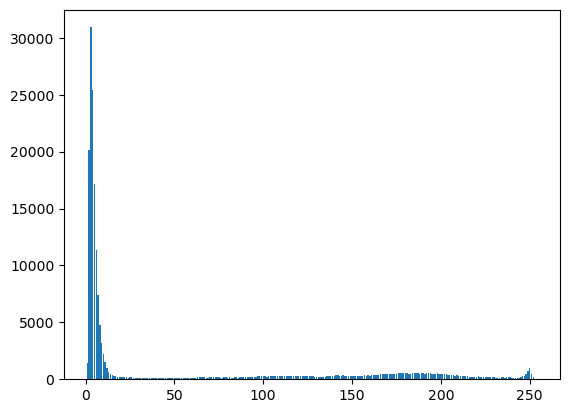

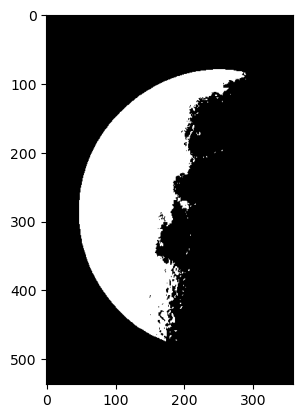

[[     0 149110]
 [   255  43136]]
[149110  43136]
Histogram:


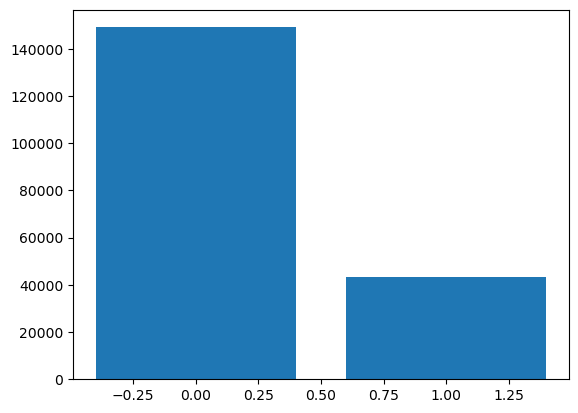

In [25]:
import matplotlib.pyplot as plt

moon_1 = openImage('img/moon.png')
plt.imshow(moon_1, cmap = 'gray', vmin=0, vmax=255)
plt.show()
moonHist = computeHistogram(moon_1)
moonFreq = np.delete(moonHist, 0, axis=1)
x3 = np.arange(1,255,1)
newMoon = moonFreq.flatten()
y3 = newMoon
print('Histogram:')
plt.bar(x3, y3)
plt.show()

imThres=thresholdImage(moon, 127)
plt.imshow(imThres, cmap = 'gray', vmin=0, vmax=255)
plt.show()

unique7, counts7 = np.unique(np.around(imThres, decimals =3), return_counts=True)
thres = np.asarray((unique7, counts7)).T
print(thres)

thresDel = np.delete(thres, 0, axis=1)

final = thresDel.flatten()
print(final)


x44 = np.arange(2)
y44 = final

print('Histogram:')
plt.bar(x44, y44)
plt.show()

<h2>Exercice 2 - generate images</h2>

1. Create the array I 4 by 4. Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using imshow() and plot the histogram.

The array:
[[127 127   0 255]
 [127   0   0 255]
 [  0 127   0 255]
 [127 127   0 255]]


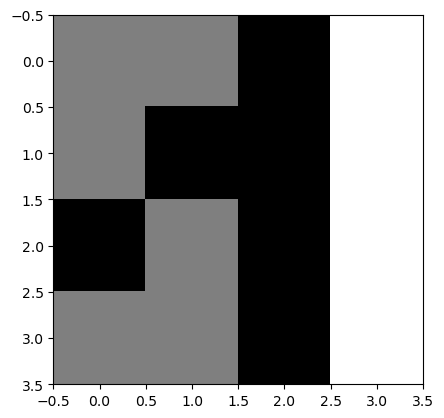

Histogram:


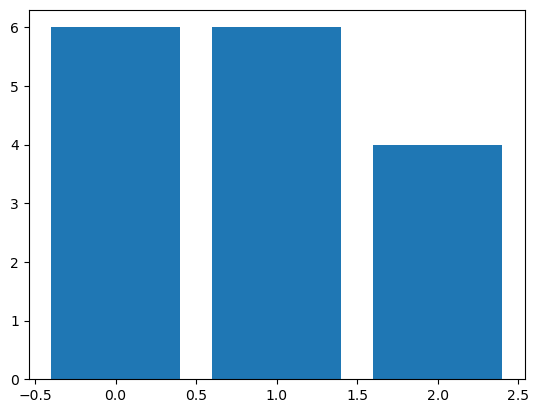

In [26]:
array = np.array([[127, 127, 0, 255],[127, 0, 0, 255],[0, 127, 0, 255],[127, 127, 0, 255]])
print('The array:')
print(array)

# Image
plt.imshow(array, cmap='gray')
plt.show()

# Computing the histogram
hist = computeHistogram(array)

Freq = np.delete(hist, 0, axis=1)

y = Freq.flatten()
x = np.arange(0,len(y))


# Plot the histogram 
print('Histogram:')
plt.bar(x,y)
plt.show()

2. We want to generate a matrix having random values. Functions rand() and randn() from numpy.matlib module generate array of given shape with random values following respectively a uniform distribution on 
[
0
,
1
[
 and a normal distribution. Create an array of shape 512 by 512 having integer elements following an uniform distribution in the set 
{
0
,
1
,
⋯
,
255
}
 . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with integer values. Display the images and their histogramms. Discuss the results.

Image 1:
[[221 108  22 ...  83  21 241]
 [ 18 222  50 ... 152   1 193]
 [ 29 162 207 ...  57 187 211]
 ...
 [148 243 218 ... 161   9 133]
 [226 114 171 ...  29  80 204]
 [183 124 137 ...  65 244  49]]


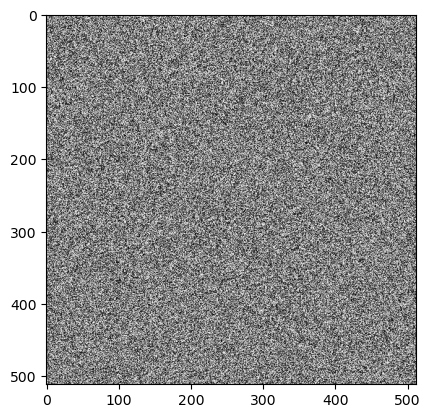

Histogram Uniformed:


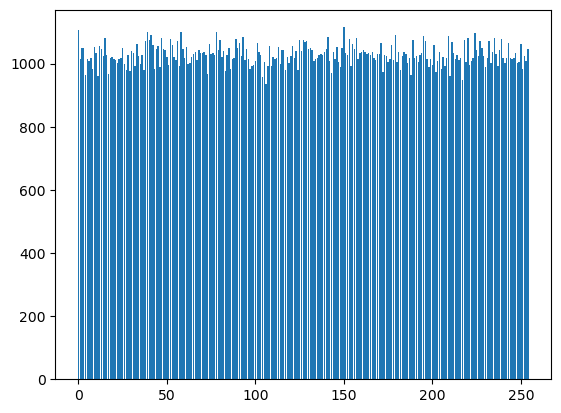

Image 2:
[[135. 113. 123. ... 123. 140. 116.]
 [145. 128. 145. ... 125. 133. 112.]
 [104. 125. 129. ... 137. 122. 120.]
 ...
 [133. 105. 140. ... 135. 112. 129.]
 [152. 106. 132. ...  91. 130. 113.]
 [112. 122. 128. ... 124. 126. 137.]]


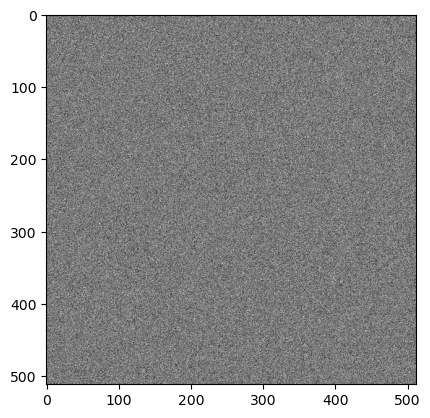

Histogram normalized:


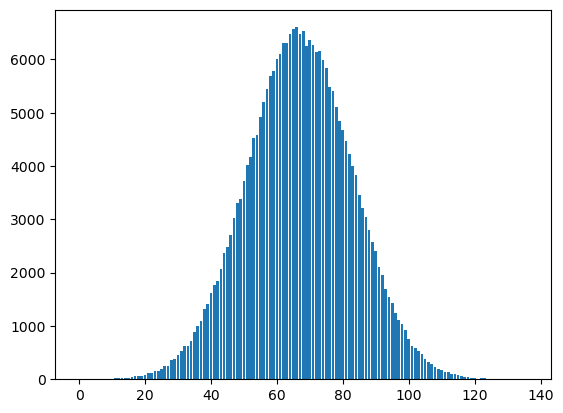

In [27]:
import numpy.matlib 
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

rand_int = np.random.randint(0, 255, (512,512))
print('Image 1:')
print(rand_int)

plt.imshow(rand_int, cmap='gray')
plt.show()

print('Histogram Uniformed:')
histUni =  computeHistogram(rand_int)

Freq = np.delete(histUni, 0, axis=1)

y = Freq.flatten()
x = np.arange(0, len(y))


plt.bar(x,y)
plt.show()


rand_norm_int = np.around(np.random.normal(loc = 128, scale=16, size=(512,512) ), decimals =0)
print('Image 2:')
print(rand_norm_int)

#Plotting
plt.imshow(rand_norm_int, cmap='gray')
plt.show()

print('Histogram normalized:')
histNorm = computeHistogram(rand_norm_int)

FreqN = np.delete(histNorm, 0, axis=1)

y2 = FreqN.flatten()
x2 = np.arange(0,len(y2))


plt.bar(x2,y2)
plt.show()

The conclusion we can make from the result is that (image 2) is a normal distribution which means that all values near the center are more likely to occur as opposed to the values in the tail and in the uniform distribution (image 1) the valuesis equaly likely to accur

<h2>Exercice 3: image manipulation</h2>

In this exercice, we work with image img/pout.png.

1. Read and display the image

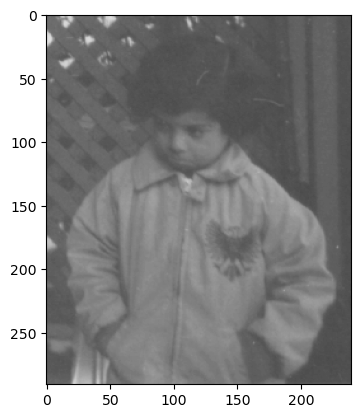

In [28]:
# Reading the image
girl = openImage('img/pout.png')

# Displaying the image
plt.imshow(girl, cmap = 'gray', vmin=0, vmax=255)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

In [29]:
girl = openImage('img/pout.png')

# Computing the histogram 
print('Histogram:')
print(computeHistogram(girl))

#maximum
print('The maximum is:')
print(np.max(girl))
#minimum
print('The minimum is:')
print(np.min(girl))

# From the histogram we can draw the conclusion that the picture has low contrast. 

Histogram:
[[  74    2]
 [  75   38]
 [  77  389]
 [  78 1245]
 [  80 1518]
 [  82 3628]
 [  83 3146]
 [  84 2041]
 [  86 1601]
 [  87 2415]
 [  89 1684]
 [  91 1506]
 [  93 1813]
 [  94 1660]
 [  95 1390]
 [  97 1572]
 [  98 2662]
 [  99 1761]
 [ 101 1387]
 [ 102 1218]
 [ 103 1287]
 [ 105 1308]
 [ 106 1288]
 [ 107 1068]
 [ 108  732]
 [ 109  639]
 [ 110  559]
 [ 112  575]
 [ 113  504]
 [ 114  502]
 [ 116  518]
 [ 117  476]
 [ 119  490]
 [ 120  599]
 [ 121 1263]
 [ 122  686]
 [ 123  708]
 [ 125  724]
 [ 126  804]
 [ 127  957]
 [ 128 2770]
 [ 130 1200]
 [ 131  973]
 [ 132 1004]
 [ 133 2434]
 [ 134 1087]
 [ 136  892]
 [ 137 1737]
 [ 138  995]
 [ 139  813]
 [ 142 1459]
 [ 143  723]
 [ 144  576]
 [ 145  512]
 [ 146  448]
 [ 147  431]
 [ 148  377]
 [ 149  600]
 [ 150  296]
 [ 151  266]
 [ 153  354]
 [ 154  154]
 [ 155  121]
 [ 156  113]
 [ 157  113]
 [ 158   91]
 [ 159  163]
 [ 160   58]
 [ 161   53]
 [ 162   50]
 [ 163   51]
 [ 164   67]
 [ 166   20]
 [ 167   21]
 [ 169   36]
 [ 170   10]
 

3. Using functions from Exercice 1, write the function histogramEqualization() getting one image, its histogram, applying an histogram equalization and returning the new image. Test this function on pout.png and discuss the result.

Histogram equalization image:


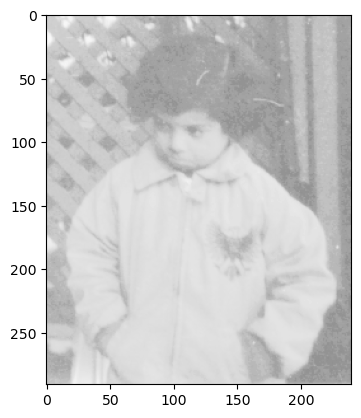

In [30]:
import numpy as np
from matplotlib import pyplot as plt


def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
#readinf image 
img = openImage('img/pout.png')

#histogram
hist = computeHistogram(img)

cdf = hist.cumsum()
number_bins = cdf.size
cdf_normalized = (number_bins-1) * cdf / cdf[-1] 


bins = list(range(0,242))
image_equalized = np.interp(img.flatten(), bins, cdf_normalized)
image_equalized = image_equalized.reshape(img.shape)

# plotting the image
print('Histogram equalization image:')
plt.imshow(image_equalized, cmap = 'gray', vmin=0, vmax=242)
plt.show()

The conclusion we can make after looking at the new image is that the picture looks lighter but the fact is that there is higher dynamic range